# Demo of the evolution model

The code in [amitosis.py](amitosis.py) and in this notebook was last tested with:

* python version 3.7.12
* numpy 1.20.3
* pandas 1.3.5
* matplotlib 3.4.2
* seaborn 0.11.1

Below we illustrate how to conduct the simulations used to generate Figure 5.
We use 10 replicate populations here but 100 in the paper.

In [1]:
run amitosis

In [2]:
sns.set_style('ticks')
sns.set_context('talk')

## Parameters

* Genomic mutation rate: $U = 0.03$
* Beneficial effect of a mutation: $s = 0.03$
* Population size: $N=3000$
* Number of replicate populations: 10
* Number of fitness loci: $L=200$
* Number of loci fixed for a beneficial mutation: $K = 5$

In [3]:
nReps = 10
N = 3000
L = 200
c = 45
U = .03
s = .03

## Parental population

In [4]:

pop = Populations(nReps=nReps, N=N, nLoci=L, ploidy=c, genomic_mu=U, selcoef=s, amitosis=True)
# implements K = 5
for i in range(nReps):
    for j in range(5):  
        pop.soma[i,:,j] += 45
pop.get_fitness()
pop.collect_data()
data = pop.evolve(1000, 10) 
data

,generation,fitness_mean,fitness_std,nReps,N,nLoci,ploidy,genomic_mu,selcoef,amitosis
0,0,1.159274,0.000000,10,3000,200,45,0.03,0.03,True
1,10,1.159500,0.000025,10,3000,200,45,0.03,0.03,True
2,20,1.159757,0.000063,10,3000,200,45,0.03,0.03,True
3,30,1.160095,0.000150,10,3000,200,45,0.03,0.03,True
4,40,1.160331,0.000199,10,3000,200,45,0.03,0.03,True
...,...,...,...,...,...,...,...,...,...,...
96,960,1.551316,0.057633,10,3000,200,45,0.03,0.03,True
97,970,1.556981,0.057463,10,3000,200,45,0.03,0.03,True
98,980,1.562202,0.057659,10,3000,200,45,0.03,0.03,True
99,990,1.567016,0.057629,10,3000,200,45,0.03,0.03,True


## Progeny population

In [6]:
pop = Populations(nReps=nReps, N=N, nLoci=L, ploidy=c, genomic_mu=U, selcoef=s, amitosis=True)
# implements K = 5 at non-overlapping loci for the two parents resulting in 10
# loci with 22-23 beneficial alleles 
for i in range(nReps):
    for j in range(5):  
        pop.soma[i,:,j] += 22
    for j in range(5, 10):  
        pop.soma[i,:,j] += 23
pop.get_fitness()
pop.collect_data()
data2 = pop.evolve(1000, 10) 
data2

,generation,fitness_mean,fitness_std,nReps,N,nLoci,ploidy,genomic_mu,selcoef,amitosis
0,0,1.160540,0.000000,10,3000,200,45,0.03,0.03,True
1,10,1.161790,0.000732,10,3000,200,45,0.03,0.03,True
2,20,1.165790,0.002602,10,3000,200,45,0.03,0.03,True
3,30,1.171560,0.001769,10,3000,200,45,0.03,0.03,True
4,40,1.180192,0.002312,10,3000,200,45,0.03,0.03,True
...,...,...,...,...,...,...,...,...,...,...
96,960,1.803254,0.067122,10,3000,200,45,0.03,0.03,True
97,970,1.809634,0.067775,10,3000,200,45,0.03,0.03,True
98,980,1.814092,0.067679,10,3000,200,45,0.03,0.03,True
99,990,1.819891,0.068179,10,3000,200,45,0.03,0.03,True


## Plot

In [7]:
red = sns.xkcd_rgb['pale red']
gre = sns.xkcd_rgb['light green'] 

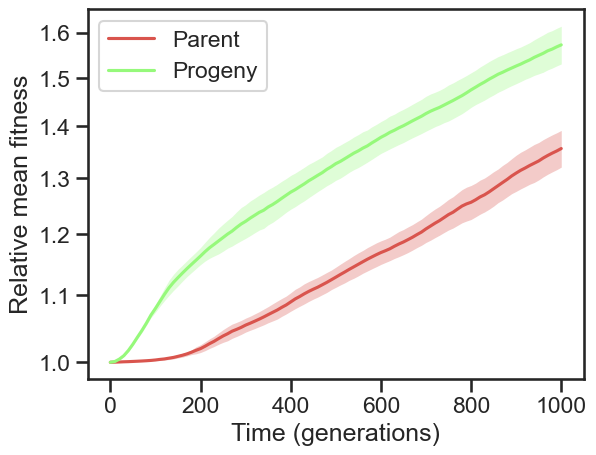

In [8]:
t = data['generation']
w1 = data['fitness_mean'] / data['fitness_mean'][0]
w2 = data2['fitness_mean'] / data2['fitness_mean'][0]
w1ci = 2.262157 * (data['fitness_std'] / data['fitness_mean'][0]) / np.sqrt(nReps)
w2ci = 2.262157 * (data2['fitness_std'] / data2['fitness_mean'][0]) / np.sqrt(nReps) 
plt.semilogy(t, w1, label='Parent', color=red)
plt.fill_between(t, w1 - w1ci, w1 + w1ci, alpha=.3, color=red, lw=.001)
plt.plot(t, w2, label='Progeny', color=gre)
plt.fill_between(t, w2 - w2ci, w2 + w2ci, alpha=.3, color=gre, lw=.001)
plt.yticks(ticks=np.arange(1, 1.61, .1), labels=np.arange(1, 1.61, .1).round(2))
plt.ylabel('Relative mean fitness')
plt.xlabel('Time (generations)')
plt.legend();